# Tushar_Pawar
# Maharashtra_Population

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

In [3]:
mh=pd.read_csv(r"C:\Users\91897\Desktop\Python Data set\Practice Dataset\MHA population Report\MHA Population Report.csv")

In [4]:
mh.head(2)

,Census_Year,District,Taluka,Town_Village,No_of_households,Total_population,Total_male_population,Total_female_population,Total_0_to_6_year_children,Male_0_to_6_year_children,...,Female_literates,Total_iliterates,Male_iliterates,Female_iliterates,Total_main_workers,Male_main_workers,Female_main_workers,Total_non_workers,Male_non_workers,Female_non_workers
0,2011,AHMADNAGAR,AKOLA,ABIT KHIND,201,732,359,373,73,36,...,175,313.0,115.0,198.0,424,204,220,285,143,142
1,2011,AHMADNAGAR,AKOLA,AGAR,37,247,162,85,27,15,...,53,58.0,26.0,32.0,106,58,48,140,103,37


In [4]:
mh.shape

(132315, 29)

In [5]:
mh.columns

Index(['Census_Year', 'District', 'Taluka', 'Town_Village', 'No_of_households',
       'Total_population', 'Total_male_population', 'Total_female_population',
       'Total_0_to_6_year_children', 'Male_0_to_6_year_children',
       'Female_0_to_6_year_children', 'Total_SC_population',
       'Male_SC_population', 'Female_SC_population', 'Total_ST_population',
       'Male_ST_population', 'Female_ST_population', 'Total_literates',
       'Male_literates', 'Female_literates', 'Total_iliterates',
       'Male_iliterates', 'Female_iliterates', 'Total_main_workers',
       'Male_main_workers', 'Female_main_workers', 'Total_non_workers',
       'Male_non_workers', 'Female_non_workers'],
      dtype='object')

In [8]:
mh.isnull().sum()[mh.isnull().sum()>0]

Series([], dtype: int64)

In [29]:
mh.Taluka.fillna('KHED',inplace=True)
mh.Town_Village.fillna('BORGAON',inplace=True)
mh.Total_iliterates.fillna(202.0,inplace=True)
mh.Male_iliterates.fillna(48.0,inplace=True)
mh.Female_iliterates.fillna(111.0,inplace=True)

In [51]:
#mh.info()

In [115]:
mh1=mh

In [49]:
#mh= mh.drop(['District','Taluka','Town_Village'],axis = 1)

In [154]:
#mh.corr()

In [9]:
mh.head()

,Census_Year,District,Taluka,Town_Village,No_of_households,Total_population,Total_male_population,Total_female_population,Total_0_to_6_year_children,Male_0_to_6_year_children,...,Female_literates,Total_iliterates,Male_iliterates,Female_iliterates,Total_main_workers,Male_main_workers,Female_main_workers,Total_non_workers,Male_non_workers,Female_non_workers
0,2011,AHMADNAGAR,AKOLA,ABIT KHIND,201,732,359,373,73,36,...,175,313.0,115.0,198.0,424,204,220,285,143,142
1,2011,AHMADNAGAR,AKOLA,AGAR,37,247,162,85,27,15,...,53,58.0,26.0,32.0,106,58,48,140,103,37
2,2011,AHMADNAGAR,AKOLA,AGASTINAGAR,357,1536,799,737,178,97,...,467,462.0,192.0,270.0,787,439,348,681,332,349
3,2011,AHMADNAGAR,AKOLA,AKOLA,3861,18278,9381,8897,2066,1101,...,6437,4400.0,1940.0,2460.0,6688,4599,2089,10937,4422,6515
4,2011,AHMADNAGAR,AKOLA,AMBAD,529,2590,1352,1238,333,189,...,743,845.0,350.0,495.0,1491,763,728,1083,580,503


In [34]:
# Now want to see how many of Town/Villages have Total Population=0

zero_population=mh[mh.Total_population==0]
zero_population.head(2)

,Census_Year,District,Taluka,Town_Village,No_of_households,Total_population,Total_male_population,Total_female_population,Total_0_to_6_year_children,Male_0_to_6_year_children,...,Total_iliterates,Male_iliterates,Female_iliterates,Total_main_workers,Male_main_workers,Female_main_workers,Total_non_workers,Male_non_workers,Female_non_workers,population_group


In [30]:
# Get the count of rows
zero_population.shape[0]

2616

In [31]:
# We will delete these rows because our analysis will not focus there.
mh=mh[mh.Total_population!=0]
# Reset the index after removing rows
mh.reset_index(drop=True,inplace=True)

# We will create a new column named as Population_Group, which will separate the districts into villages, towns and cities
#according to their population in accordance with the division of the Indians

In [32]:


bin_breaks=[0,15000,100000,100000000]
bin_labels=["Village","Town","City"]

mh=mh.copy()

mh['population_group']=pd.cut(mh['Total_population'],
                              bins=bin_breaks,labels=bin_labels)

In [35]:
mh=mh.copy()
mh['Part_Time_Workers']=mh['Total_population'] - (mh['Total_main_workers']+mh['Total_non_workers'])

In [36]:
mh.columns

Index(['Census_Year', 'District', 'Taluka', 'Town_Village', 'No_of_households',
       'Total_population', 'Total_male_population', 'Total_female_population',
       'Total_0_to_6_year_children', 'Male_0_to_6_year_children',
       'Female_0_to_6_year_children', 'Total_SC_population',
       'Male_SC_population', 'Female_SC_population', 'Total_ST_population',
       'Male_ST_population', 'Female_ST_population', 'Total_literates',
       'Male_literates', 'Female_literates', 'Total_iliterates',
       'Male_iliterates', 'Female_iliterates', 'Total_main_workers',
       'Male_main_workers', 'Female_main_workers', 'Total_non_workers',
       'Male_non_workers', 'Female_non_workers', 'population_group',
       'Part_Time_Workers'],
      dtype='object')

In [12]:
mh.shape

(129699, 29)

In [80]:
132315-129699 #--->2616 columns or villag have zero population so we delete this rows from dataset

2616

In [38]:
#Remove columns:Taluka and Town/Village because we will not use them anymore in the analysis process

mh=mh.drop(['Taluka','Town_Village'],axis=1)

In [37]:
# Remove any duplicate value               

mh.drop_duplicates(inplace=True)

In [160]:
#mh.info()

# Starting with correlation matrix to understand how our data are related

Text(0.5, 1.0, 'correlation matrix Heatmap')

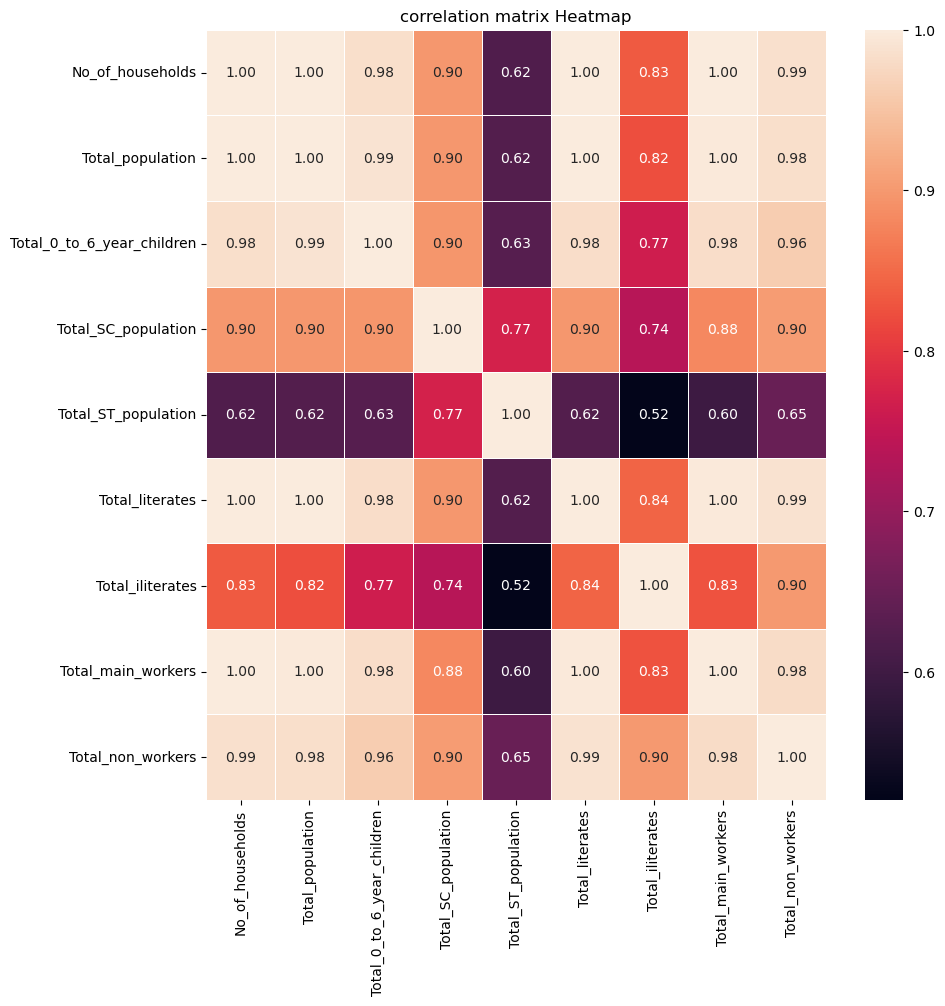

In [15]:

# Select the above numerical columns
numeric_col=mh[["No_of_households","Total_population","Total_0_to_6_year_children","Total_SC_population",
                 "Total_ST_population","Total_literates","Total_iliterates","Total_main_workers","Total_non_workers"]]
cor_matrix=numeric_col.corr()
plt.figure(figsize = (10,10))
sns.heatmap(cor_matrix, annot = True,fmt='.2f',linewidths=0.5)
plt.title('correlation matrix Heatmap')

# Group by district in descending total population

In [209]:
df=mh.groupby('District')['Total_population'].sum()
df=df.sort_values(ascending=False)
df=pd.DataFrame(df)
df1.head(5)

,Total_population
District,
THANE,24441123
PUNE,22194495
MUMBAI SUBURBAN,17997381
NASHIK,14952335
NAGPUR,12008346


In [17]:
Pop_by_District=mh.groupby("District")["Total_population"].sum()
Pop_by_District=Pop_by_District.sort_values(ascending=False)
Pop_by_District=Pop_by_District.reset_index()
Pop_by_District.columns=["District","Total_Population"]
# Display the DataFrame
Pop_by_District.head(5)

,District,Total_Population
0,THANE,24441123
1,PUNE,22194495
2,MUMBAI SUBURBAN,17997381
3,NASHIK,14952335
4,NAGPUR,12008346


In [189]:
pip install --user squarify

Note: you may need to restart the kernel to use updated packages.


In [18]:
import squarify

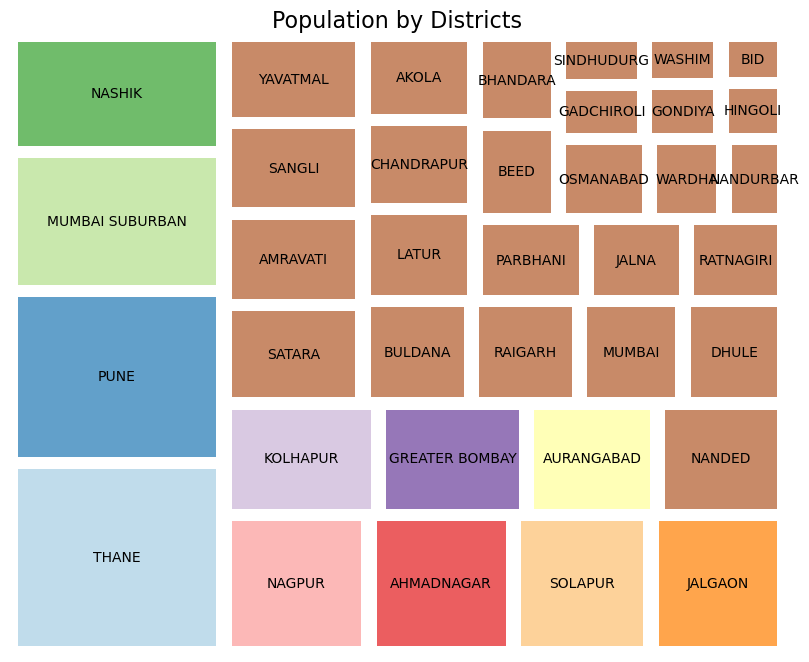

In [19]:
districts=Pop_by_District['District']
population=Pop_by_District['Total_Population']
plt.figure(figsize=(10,8))
squarify.plot(sizes=population,label=districts,alpha=0.7,pad=True,color=plt.cm.Paired(range(len(districts))))
plt.title('Population by Districts',fontsize=16)
plt.axis('off')
plt.show()

In [42]:
mh.head(2)

,Census_Year,District,No_of_households,Total_population,Total_male_population,Total_female_population,Total_0_to_6_year_children,Male_0_to_6_year_children,Female_0_to_6_year_children,Total_SC_population,...,Male_iliterates,Female_iliterates,Total_main_workers,Male_main_workers,Female_main_workers,Total_non_workers,Male_non_workers,Female_non_workers,population_group,Part_Time_Workers
0,2011,AHMADNAGAR,201,732,359,373,73,36,37,12,...,115.0,198.0,424,204,220,285,143,142,Village,23
1,2011,AHMADNAGAR,37,247,162,85,27,15,12,9,...,26.0,32.0,106,58,48,140,103,37,Village,1


# New dataframe of Census Year, Population_Group and Total population

In [50]:


new_dataframe=mh.groupby(['Census_Year','population_group'])['Total_population'].sum().reset_index()
new_dataframe

,Census_Year,population_group,Total_population
0,1991,Village,66070125
1,1991,Town,137292074
2,1991,City,135719509
3,2001,Village,55028470
4,2001,Town,9901011
5,2001,City,31949146
6,2011,Village,61101358
7,2011,Town,12304055
8,2011,City,38968920


# Adding a Percentage column of each Population group in each year

In [53]:


new_dataframe['Percentage']= (new_dataframe['Total_population'] / new_dataframe.groupby('Census_Year')
                                           ['Total_population'].transform('sum')) * 100
new_dataframe

,Census_Year,population_group,Total_population,Percentage
0,1991,Village,66070125,19.485016
1,1991,Town,137292074,40.489378
2,1991,City,135719509,40.025606
3,2001,Village,55028470,56.801455
4,2001,Town,9901011,10.220016
5,2001,City,31949146,32.978529
6,2011,Village,61101358,54.373055
7,2011,Town,12304055,10.949168
8,2011,City,38968920,34.677776


# Stacked bar chart showing the composition of population by Census Year and Population Group

In [74]:

group_data=new_dataframe.groupby(['Census_Year','population_group'])['Percentage'].sum().round().unstack()
group_data

population_group,Village,Town,City
Census_Year,,,
1991,19.0,40.0,40.0
2001,57.0,10.0,33.0
2011,54.0,11.0,35.0


Text(0.5, 1.0, 'Population Composition by Census Year and Population Group')

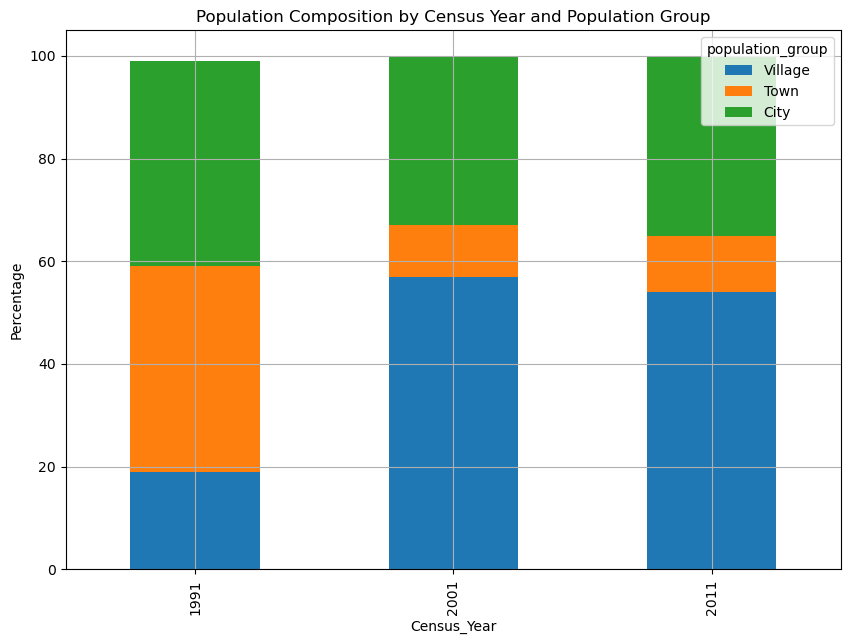

In [75]:
group_data.plot(kind='bar',stacked=True,figsize=(10,7))
plt.xlabel('Census_Year')
plt.ylabel('Percentage')
plt.grid()
plt.title('Population Composition by Census Year and Population Group')

# Creation of new Data Frame of number of Households in total population

In [95]:
Total_House_hold_pop=mh.groupby(['Census_Year','population_group'])['No_of_households'].sum() / mh.groupby(['Census_Year','population_group'])['Total_population'].sum()*100
Total_House_hold_pop=Total_House_hold_pop.reset_index()
Total_House_hold_pop.rename(columns={0:'Percentage'},inplace=True)
Total_House_hold_pop

,Census_Year,population_group,Percentage
0,1991,Village,19.313877
1,1991,Town,18.674685
2,1991,City,19.445745
3,2001,Village,20.058922
4,2001,Town,19.300009
5,2001,City,20.744598
6,2011,Village,21.499378
7,2011,Town,21.140892
8,2011,City,22.284220


# Heatmap showing the percentage of Number of Households in Total Population by Census Year and Population Group

Text(0.5, 1.0, 'Percentage of No. of Households in Total Population by Census Year and Population Group')

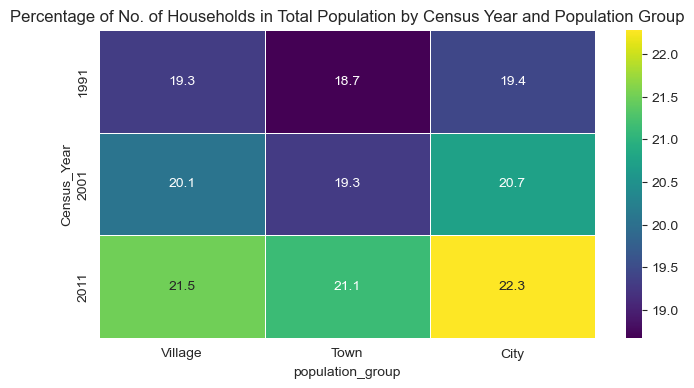

In [98]:

plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.heatmap(data=Total_House_hold_pop.pivot(index='Census_Year',columns='population_group',values='Percentage'),
             annot=True, cmap='viridis',fmt=".1f",linewidths=.5)
plt.xlabel('population_group')
plt.ylabel('Census_Year')
plt.title('Percentage of No. of Households in Total Population by Census Year and Population Group')


In [ ]:
# Certainly! It seems like you have created a heatmap graph representing the percentage of the number of households in the total population, categorized by 'Census Year' and 'Population' (e.g., village, town, and city). The percentages you've provided for the years 1991, 2001, and 2011 show how the distribution of households in these population categories has changed over time. Here's an explanation of the speech based on the provided data:

# Main speech starting from here:- from"Today, I'd like to share some insights from our analysis of census data spanning the years 1991, 2001, and 2011. We've examined how households are distributed within different population categories, including villages, towns, and cities. The data reveals interesting trends in the composition of these populations over the years.

# In 1991, we observed that villages accounted for 19.3% of the total population, towns represented 18.7%, and cities made up 19.4%. These figures suggest a relatively balanced distribution of households across these categories.

# Moving to the year 2001, we see a subtle shift in this distribution. Villages now constitute 20% of the total population, towns represent 19.3%, and cities have grown to 20.7%. This indicates a slight urbanization trend, with more people residing in towns and cities compared to villages.

# The most notable change is seen in 2011. Villages make up 21.5% of the total population, towns account for 21.1%, and cities have expanded significantly to 22.3%. This data reflects a continuing urbanization trend, with cities experiencing the most substantial growth in households.

# These insights are crucial for understanding how our society is evolving over time. The increasing concentration of households in urban areas may have implications for infrastructure development, resource allocation, and planning for future growth. It's important to keep monitoring these trends to make informed decisions for the well-being of our communities."

# This speech highlights the changing distribution of households in different population categories and emphasizes the importance of monitoring such trends for informed decision-making.

In [102]:
#Filtering the data to continue our analysis

filtered_data=mh[mh['Census_Year'].isin([1991,2001,2011])]

In [121]:
#Calculation of the percentage of children aged 0-6 by Census Year

perecntage_data1=(filtered_data.groupby('Census_Year')['Total_0_to_6_year_children'].sum()/
filtered_data.groupby('Census_Year')['Total_population'].sum()*100).reset_index()
perecntage_data1.rename(columns={0:"Percentages"},inplace=True)
perecntage_data1

,Census_Year,Percentages
0,1991,16.569652
1,2001,14.111602
2,2011,11.859040


# Line chart showing the percentage of 0-6 year children in Total Population by Census Year

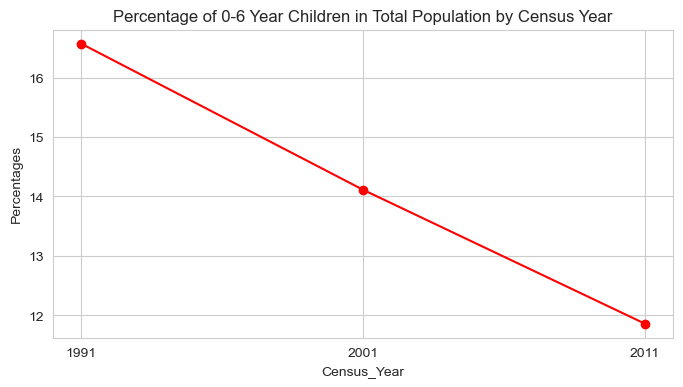

In [124]:


plt.figure(figsize=(8,4))
plt.plot(perecntage_data1['Census_Year'],
perecntage_data1['Percentages'],marker='o',linestyle='-',color='r')
plt.xlabel('Census_Year')
plt.ylabel('Percentages')
plt.title('Percentage of 0-6 Year Children in Total Population by Census Year')
plt.grid(True)
plt.xticks([1991,2001,2011])
plt.show()

In [132]:
# Calculation of the percentage of boys 0-6 years old per census year

male_percentage_data=(mh.groupby('Census_Year')['Male_0_to_6_year_children'].sum()/
mh.groupby('Census_Year')['Total_0_to_6_year_children'].sum()*100).reset_index()
male_percentage_data.rename(columns={0:"Percentages"},inplace=True)
male_percentage_data

,Census_Year,Percentages
0,1991,51.580965
1,2001,52.273909
2,2011,52.792421


In [ ]:
# female_percentage_data=(mh.groupby('Census_Year')['Female_0_to_6_year_children'].sum()/
mh.groupby('Census_Year')['Total_0_to_6_year_children'].sum()*100).reset_index()
female_percentage_data.rename(columns={0:"Percentages"},inplace=True)
female_percentage_data

# Create the pie charts for each year

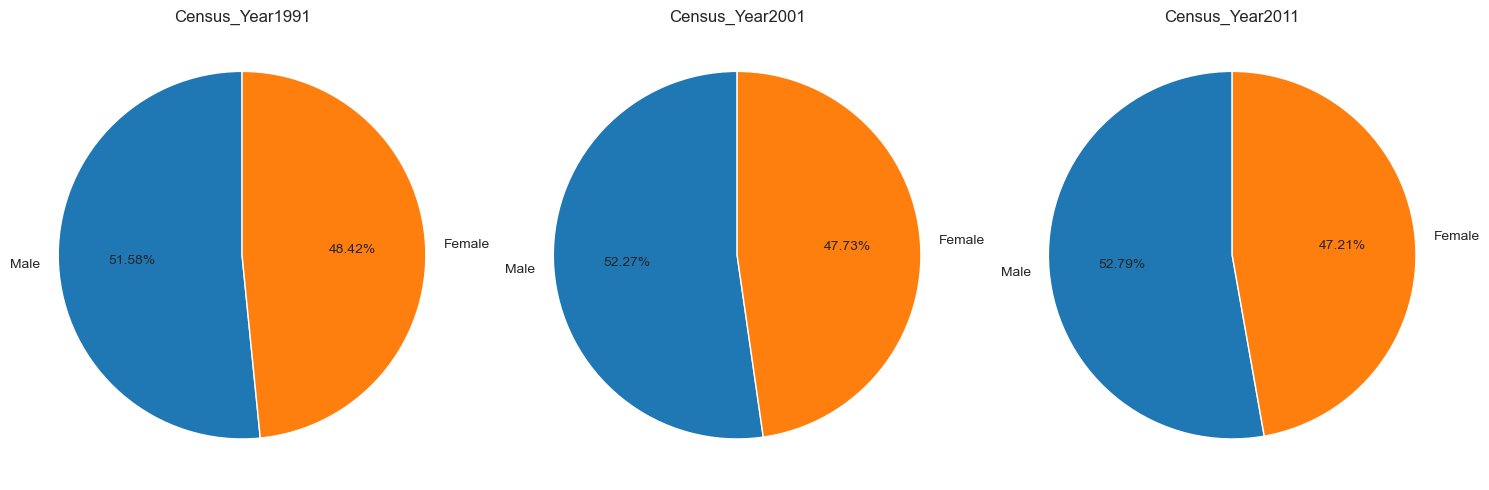

In [140]:

fig,axs=plt.subplots(1,3,figsize=(15,5))
for i,year in enumerate([1991,2001,2011]):
    male_data=male_percentage_data[male_percentage_data['Census_Year']==year]
    female_data=female_percentage_data[female_percentage_data['Census_Year']==year]
    ax=axs[i]
    ax.pie(
        [male_data['Percentages'].values[0],female_data['Percentages'].values[0]],
        labels=['Male','Female'],autopct='%1.2f%%',startangle=90,)
    ax.axis('equal')
    ax.set_title(f'Census_Year{year}')
plt.tight_layout()
plt.show()

# Now we are going to explore how literacy rate change by years

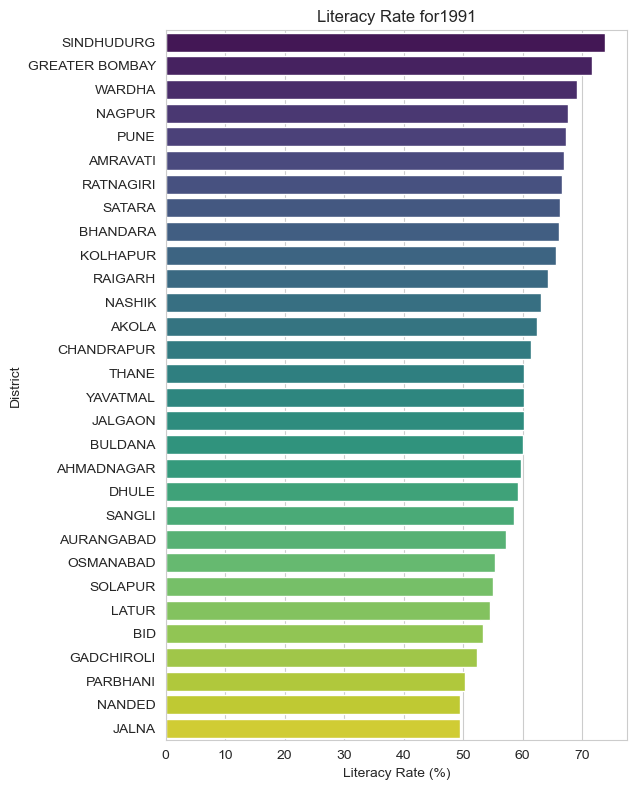

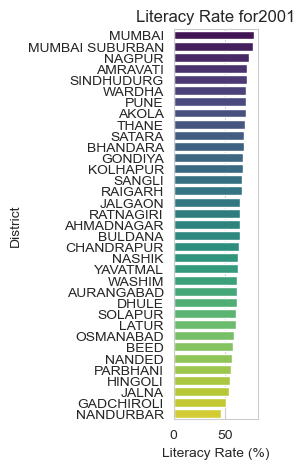

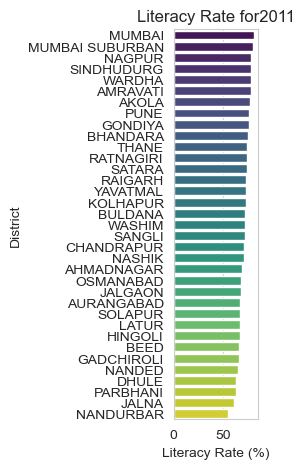

In [145]:
data_by_year=[]
#define the census years
census_years=[1991,2001,2011]
for year in census_years:
    data_year=mh[mh["Census_Year"]==year]
    literacy_rate_year=data_year.groupby(["District"])["Total_literates"].sum()/data_year.groupby(["District"])["Total_population"].sum()*100
    sorted_year=literacy_rate_year.sort_values(ascending=False)

    data_by_year.append(sorted_year)
# Create horizontal bar charts for each year with sorted districts and color mapping for literacy rate of every Distri
plt.figure(figsize=(16,8))
palette="viridis"

for i,sorted_data in enumerate(data_by_year):
    plt.subplot(131+i)
    sns.barplot(x=sorted_data,y=sorted_data.index,orient="h",palette=palette)

    plt.xlabel('Literacy Rate (%)')

    plt.ylabel('District')

    plt.title(f'Literacy Rate for{census_years[i]}')

    plt.tight_layout()
    plt.show()

In [146]:
mh.columns

Index(['Census_Year', 'District', 'No_of_households', 'Total_population',
       'Total_male_population', 'Total_female_population',
       'Total_0_to_6_year_children', 'Male_0_to_6_year_children',
       'Female_0_to_6_year_children', 'Total_SC_population',
       'Male_SC_population', 'Female_SC_population', 'Total_ST_population',
       'Male_ST_population', 'Female_ST_population', 'Total_literates',
       'Male_literates', 'Female_literates', 'Total_iliterates',
       'Male_iliterates', 'Female_iliterates', 'Total_main_workers',
       'Male_main_workers', 'Female_main_workers', 'Total_non_workers',
       'Male_non_workers', 'Female_non_workers', 'population_group',
       'Part_Time_Workers'],
      dtype='object')

# Calculation of Literacy Rate column

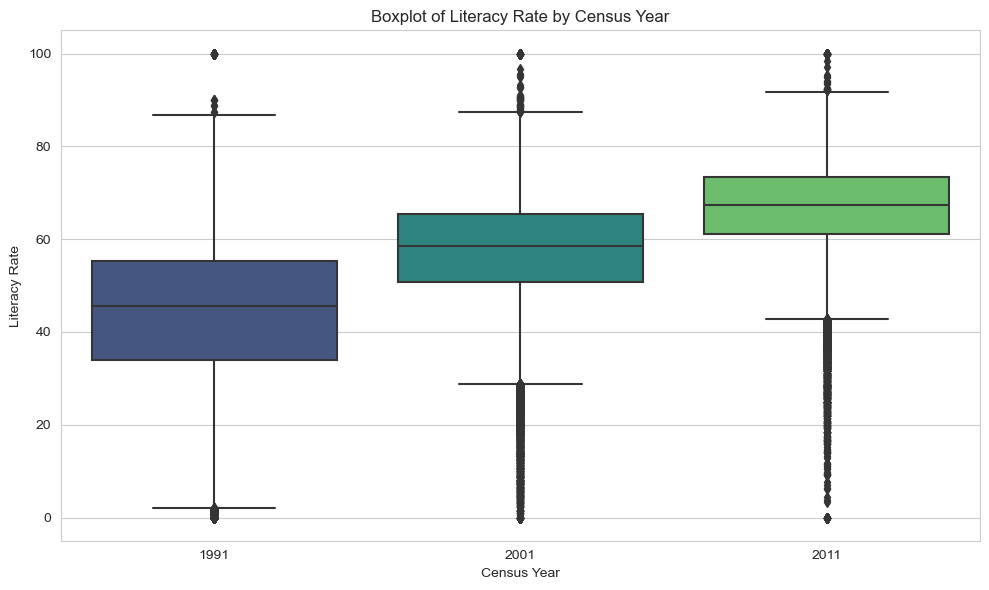

In [150]:

mh["Literacy Rate"]=(mh["Total_literates"]/mh["Total_population"])*100
# Creation of a new Data frame with columns: District, Census Year, Literacy Rate
districts_census_years_df=mh[["District","Census_Year","Literacy Rate"]]
# Data frame display
districts_census_years_df
# Boxplot with axes :Literacy Rate and Census Year
plt.figure(figsize=(10,6))
sns.boxplot(data=districts_census_years_df,x="Census_Year",y="Literacy Rate",palette="viridis")
plt.xlabel("Census Year")
plt.ylabel("Literacy Rate")
plt.title("Boxplot of Literacy Rate by Census Year")
plt.tight_layout()
plt.show()

In [164]:
mh.columns

Index(['Census_Year', 'District', 'No_of_households', 'Total_population',
       'Total_male_population', 'Total_female_population',
       'Total_0_to_6_year_children', 'Male_0_to_6_year_children',
       'Female_0_to_6_year_children', 'Total_SC_population',
       'Male_SC_population', 'Female_SC_population', 'Total_ST_population',
       'Male_ST_population', 'Female_ST_population', 'Total_literates',
       'Male_literates', 'Female_literates', 'Total_iliterates',
       'Male_iliterates', 'Female_iliterates', 'Total_main_workers',
       'Male_main_workers', 'Female_main_workers', 'Total_non_workers',
       'Male_non_workers', 'Female_non_workers', 'population_group',
       'Part_Time_Workers', 'Literacy Rate'],
      dtype='object')

# Group the data by "Population_Group" and "Census Year" and calculate the mean literacy rate

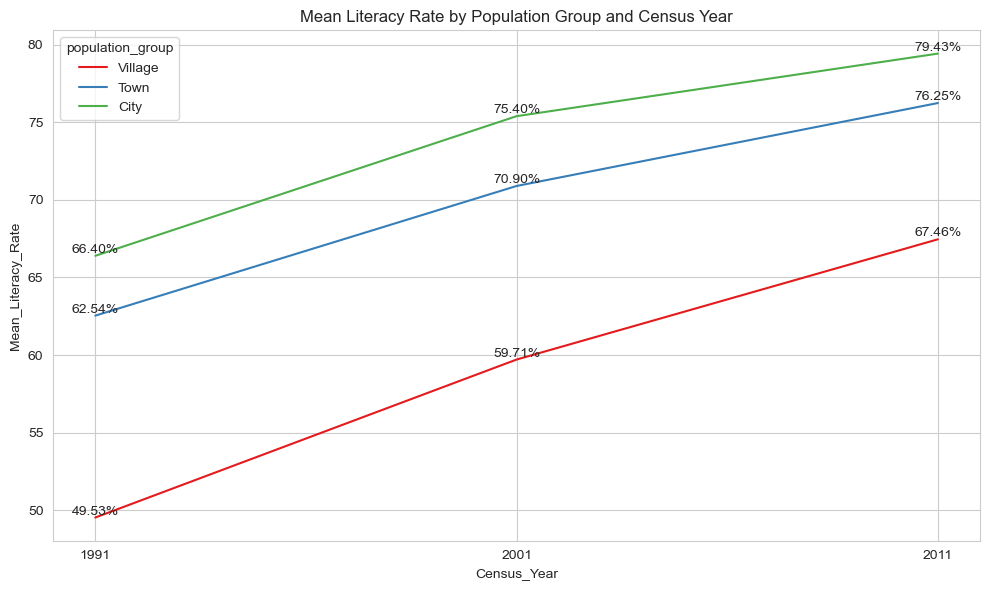

In [184]:
grouped_data1=mh.groupby(['population_group','Census_Year'])['Total_literates'].sum()/ mh.groupby(['population_group','Census_Year'])['Total_population'].sum()*100

# Create a DataFrame with the grouped data
grouped_df=grouped_data1.reset_index()
grouped_df.columns=['population_group','Census_Year','Mean_Literacy_Rate']

# Create a line chart
plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_df,x='Census_Year',y='Mean_Literacy_Rate',hue='population_group',palette='Set1')
plt.xlabel('Census_Year')
plt.ylabel('Mean_Literacy_Rate')
plt.title('Mean Literacy Rate by Population Group and Census Year')
plt.legend(title='population_group')

# Add percentage labels to the line chart

for _, row in grouped_df.iterrows():
    plt.text(row['Census_Year'],row['Mean_Literacy_Rate'], f"{row['Mean_Literacy_Rate']:.2f}%",ha='center',va='bottom')
 # Set the x-axis ticks to only display 1991, 2001, and 2011

plt.xticks([1991,2001,2011])
plt.tight_layout()
plt.show()

In [189]:
mh.columns

Index(['Census_Year', 'District', 'No_of_households', 'Total_population',
       'Total_male_population', 'Total_female_population',
       'Total_0_to_6_year_children', 'Male_0_to_6_year_children',
       'Female_0_to_6_year_children', 'Total_SC_population',
       'Male_SC_population', 'Female_SC_population', 'Total_ST_population',
       'Male_ST_population', 'Female_ST_population', 'Total_literates',
       'Male_literates', 'Female_literates', 'Total_iliterates',
       'Male_iliterates', 'Female_iliterates', 'Total_main_workers',
       'Male_main_workers', 'Female_main_workers', 'Total_non_workers',
       'Male_non_workers', 'Female_non_workers', 'population_group',
       'Part_Time_Workers', 'Literacy Rate'],
      dtype='object')

# Filter the data for the year 1991,2001,2011

In [215]:
data_1991=mh[mh['Census_Year']==1991]

# Calculate the percentage of male literates by district
male_lit_per_1991=data_1991.groupby('District').apply(lambda x: (x['Male_literates'].sum()/x['Total_literates'].sum()) * 100).reset_index()
male_lit_per_1991.columns=['District','Percentage_male']

# Calculate the percentage of female literates by district
female_lit_per_1991=data_1991.groupby('District').apply(lambda x :(x['Female_literates'].sum()/x['Total_literates'].sum()) * 100).reset_index()
female_lit_per_1991.columns=['District','Percentage_female']

# Now we have two DataFrames: male_lit_per_1991 and female_lit_per_1991
# Merge the male and female DataFrames on the "District" column
merged_lit_per_1991=pd.merge(male_lit_per_1991,female_lit_per_1991,on='District')

# Now we have a single DataFrame with both male and female percentages for 1991
merged_lit_per_1991.head(3)

,District,Percentage_male,Percentage_female
0,AHMADNAGAR,60.163335,39.836665
1,AKOLA,57.235671,42.764329
2,AMRAVATI,56.229375,43.770625


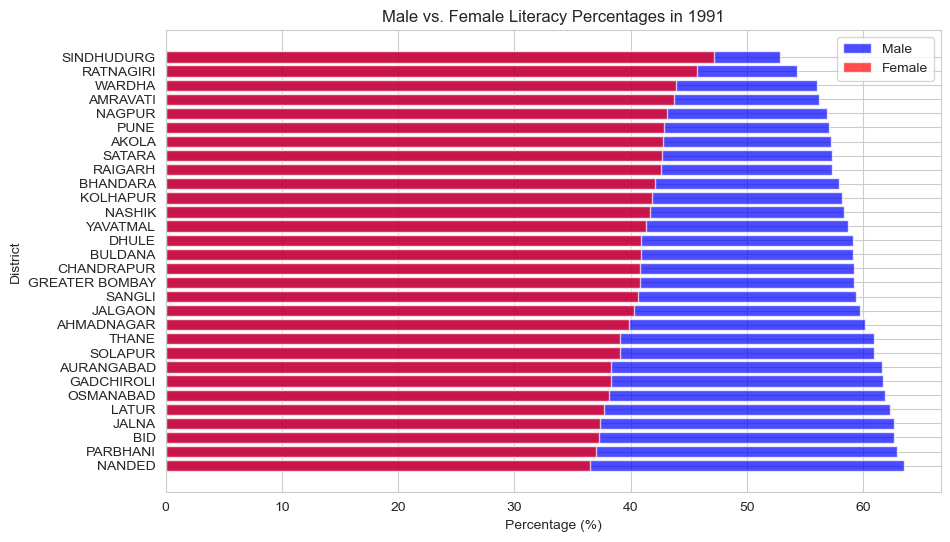

In [216]:
#Sort the DataFrame by Percentage_Male in ascending order

sorted_df=merged_lit_per_1991.sort_values(by='Percentage_male')

# Create a horizontal bar plot
plt.figure(figsize=(10,6))
plt.barh(sorted_df['District'],sorted_df['Percentage_male'],label='Male',color='blue',alpha=.7)
plt.barh(sorted_df['District'],sorted_df['Percentage_female'],label='Female',color='red',alpha=.7)
plt.xlabel('Percentage (%)')
plt.ylabel('District')
plt.title('Male vs. Female Literacy Percentages in 1991')
plt.legend()

# Invert the y-axis to display the highest value at the top
plt.gca().invert_yaxis()
plt.show()


In [218]:
data_2001=mh[mh['Census_Year']==2001]

# Calculate the percentage of male literates by district
male_lit_per_2001=data_2001.groupby('District').apply(lambda x: (x['Male_literates'].sum()/x['Total_literates'].sum()) * 100).reset_index()
male_lit_per_2001.columns=['District','Percentage_male']

# Calculate the percentage of female literates by district
female_lit_per_2001=data_2001.groupby('District').apply(lambda x :(x['Female_literates'].sum()/x['Total_literates'].sum()) * 100).reset_index()
female_lit_per_2001.columns=['District','Percentage_female']

# Now we have two DataFrames: male_lit_per_1991 and female_lit_per_1991
# Merge the male and female DataFrames on the "District" column
merged_lit_per_2001=pd.merge(male_lit_per_2001,female_lit_per_2001,on='District')

# Now we have a single DataFrame with both male and female percentages for 2001
merged_lit_per_2001.head(3)

,District,Percentage_male,Percentage_female
0,AHMADNAGAR,58.378771,41.621229
1,AKOLA,56.329955,43.670045
2,AMRAVATI,55.616415,44.383585


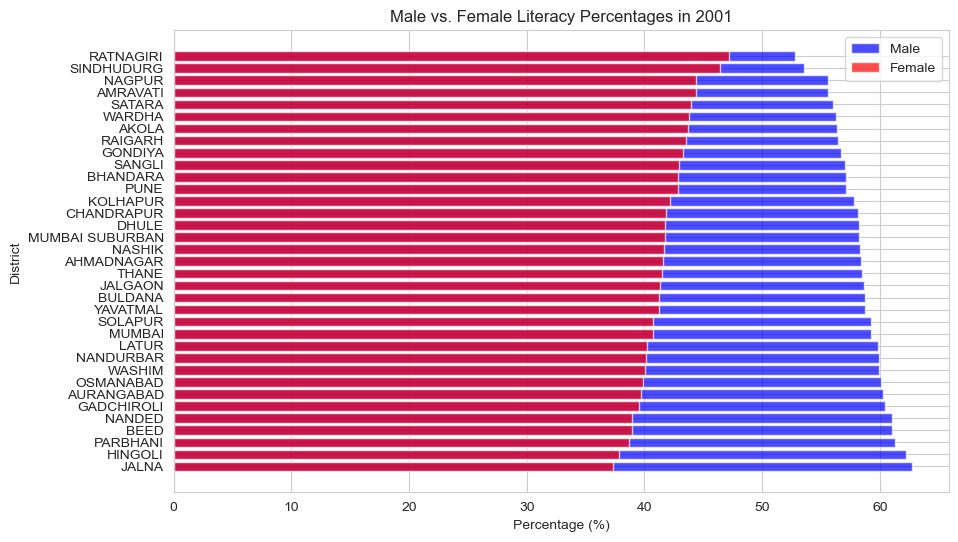

In [221]:
#Sort the DataFrame by Percentage_Male in ascending order

sorted_df=merged_lit_per_2001.sort_values(by='Percentage_male')

# Create a horizontal bar plot
plt.figure(figsize=(10,6))
plt.barh(sorted_df['District'],sorted_df['Percentage_male'],label='Male',color='blue',alpha=.7)
plt.barh(sorted_df['District'],sorted_df['Percentage_female'],label='Female',color='red',alpha=.7)
plt.xlabel('Percentage (%)')
plt.ylabel('District')
plt.title('Male vs. Female Literacy Percentages in 2001')
plt.legend()

# Invert the y-axis to display the highest value at the top
plt.gca().invert_yaxis()
plt.show()

In [222]:
data_2011=mh[mh['Census_Year']==2011]

# Calculate the percentage of male literates by district
male_lit_per_2011=data_2011.groupby('District').apply(lambda x: (x['Male_literates'].sum()/x['Total_literates'].sum()) * 100).reset_index()
male_lit_per_2011.columns=['District','Percentage_male']

# Calculate the percentage of female literates by district
female_lit_per_2011=data_2011.groupby('District').apply(lambda x :(x['Female_literates'].sum()/x['Total_literates'].sum()) * 100).reset_index()
female_lit_per_2011.columns=['District','Percentage_female']

# Now we have two DataFrames: male_lit_per_1991 and female_lit_per_1991
# Merge the male and female DataFrames on the "District" column
merged_lit_per_2011=pd.merge(male_lit_per_2011,female_lit_per_2011,on='District')

# Now we have a single DataFrame with both male and female percentages for 2001
merged_lit_per_2011.head(3)

,District,Percentage_male,Percentage_female
0,AHMADNAGAR,56.263226,43.736774
1,AKOLA,53.779297,46.220703
2,AMRAVATI,53.604396,46.395604


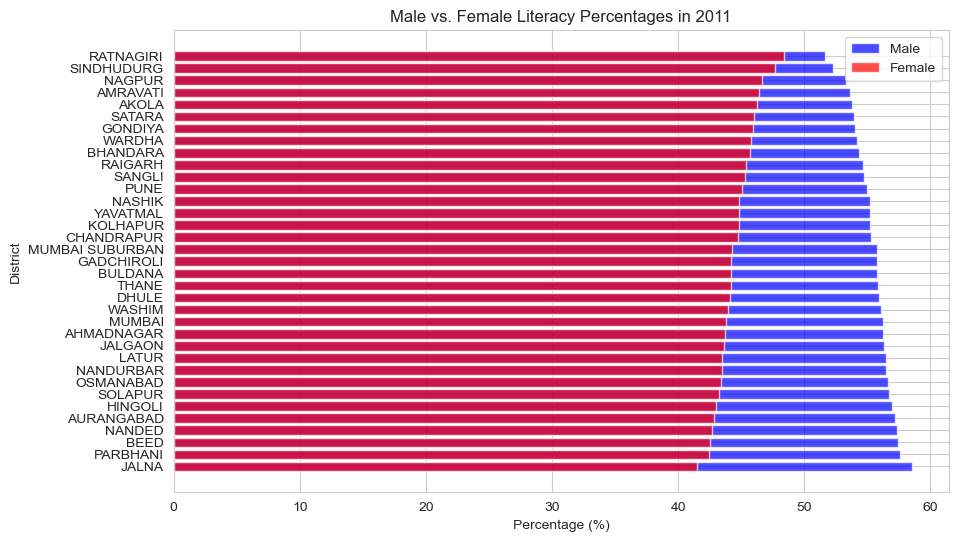

In [223]:
#Sort the DataFrame by Percentage_Male in ascending order

sorted_df=merged_lit_per_2011.sort_values(by='Percentage_male')

# Create a horizontal bar plot
plt.figure(figsize=(10,6))
plt.barh(sorted_df['District'],sorted_df['Percentage_male'],label='Male',color='blue',alpha=.7)
plt.barh(sorted_df['District'],sorted_df['Percentage_female'],label='Female',color='red',alpha=.7)
plt.xlabel('Percentage (%)')
plt.ylabel('District')
plt.title('Male vs. Female Literacy Percentages in 2011')
plt.legend()

# Invert the y-axis to display the highest value at the top
plt.gca().invert_yaxis()
plt.show()

In [226]:
mh.columns

Index(['Census_Year', 'District', 'No_of_households', 'Total_population',
       'Total_male_population', 'Total_female_population',
       'Total_0_to_6_year_children', 'Male_0_to_6_year_children',
       'Female_0_to_6_year_children', 'Total_SC_population',
       'Male_SC_population', 'Female_SC_population', 'Total_ST_population',
       'Male_ST_population', 'Female_ST_population', 'Total_literates',
       'Male_literates', 'Female_literates', 'Total_iliterates',
       'Male_iliterates', 'Female_iliterates', 'Total_main_workers',
       'Male_main_workers', 'Female_main_workers', 'Total_non_workers',
       'Male_non_workers', 'Female_non_workers', 'population_group',
       'Part_Time_Workers', 'Literacy Rate'],
      dtype='object')

# Group the data by Census Year and Population_Group and aggregate them in a new Data frame named grouped_data2

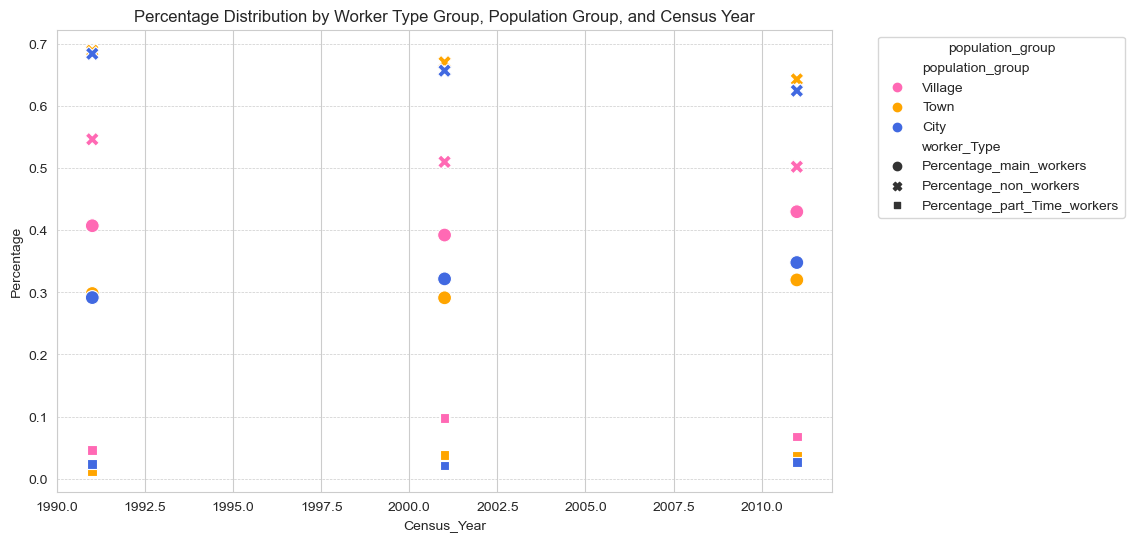

In [239]:

group_data2=mh.groupby(['Census_Year','population_group']).agg({
    'Total_main_workers':'sum',
    'Total_non_workers':'sum',
    'Part_Time_Workers':'sum',
    'Total_population':'sum'
}).reset_index()

#Calculate percentages
group_data2['Percentage_main_workers']=group_data2['Total_main_workers']/group_data2['Total_population']
group_data2['Percentage_non_workers']=group_data2['Total_non_workers']/group_data2['Total_population']
group_data2['Percentage_part_Time_workers']=group_data2['Part_Time_Workers']/group_data2['Total_population']

#Reshape the data for plotting
group_data2_long=pd.melt(group_data2,id_vars=['Census_Year','population_group'],
                          value_vars=['Percentage_main_workers','Percentage_non_workers','Percentage_part_Time_workers'],
                          var_name='worker_Type', value_name='Percentage')

# Create the plot using seaborn

plt.figure(figsize=(10,6))
sns.scatterplot(data=group_data2_long,x='Census_Year',y='Percentage',hue='population_group',style='worker_Type',
                palette={'City':'#4169E1','Town':'#FFA500','Village':'#FF69B4'}, s=100)
plt.title('Percentage Distribution by Worker Type Group, Population Group, and Census Year')
plt.xlabel('Census_Year')
plt.ylabel('Percentage')
plt.legend(title='population_group',bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True, axis='y',linestyle='--',linewidth=0.5)
plt.show()

In [240]:
mh.columns

Index(['Census_Year', 'District', 'No_of_households', 'Total_population',
       'Total_male_population', 'Total_female_population',
       'Total_0_to_6_year_children', 'Male_0_to_6_year_children',
       'Female_0_to_6_year_children', 'Total_SC_population',
       'Male_SC_population', 'Female_SC_population', 'Total_ST_population',
       'Male_ST_population', 'Female_ST_population', 'Total_literates',
       'Male_literates', 'Female_literates', 'Total_iliterates',
       'Male_iliterates', 'Female_iliterates', 'Total_main_workers',
       'Male_main_workers', 'Female_main_workers', 'Total_non_workers',
       'Male_non_workers', 'Female_non_workers', 'population_group',
       'Part_Time_Workers', 'Literacy Rate'],
      dtype='object')

# Calculate male non-workers' percentages by Census Year

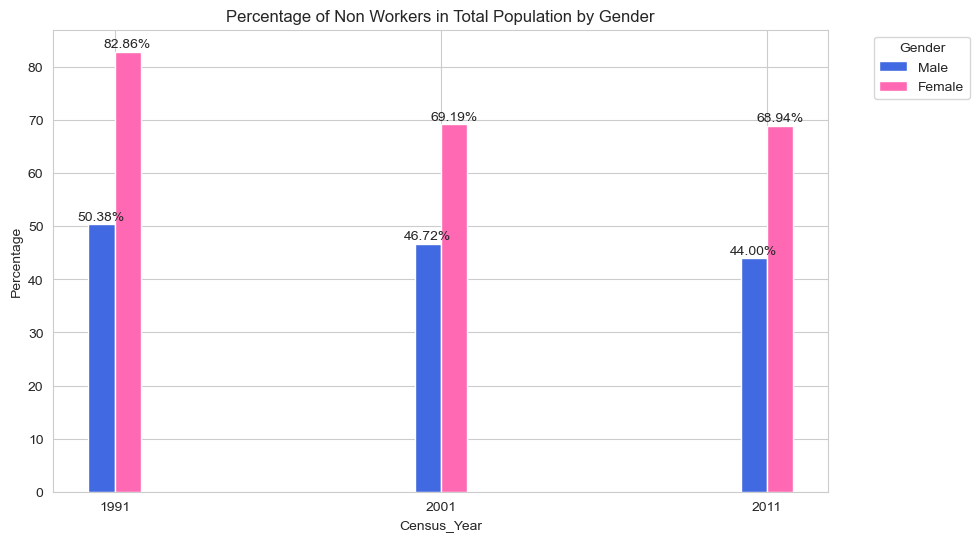

In [242]:
male_non_workers=mh.groupby('Census_Year').apply(lambda x: (x['Male_non_workers'].sum()/x['Total_male_population'].sum())*100).reset_index(name='Male_Percentage')
# Calculate female non-workers' percentages by Census Year
female_non_workers=mh.groupby('Census_Year').apply(lambda x: (x['Female_non_workers'].sum()/x['Total_female_population'].sum())*100).reset_index(name='Female_Percentage')
# Combine male_non_workers and female_non_workers DataFrames
combined_data=pd.merge(male_non_workers,female_non_workers,on='Census_Year')
# Create the bar plot
plt.figure(figsize=(10,6))
colors=["#4169E1","#FF69B4"]
bar_width=0.8
index=combined_data['Census_Year']
bars1=plt.bar(index,combined_data['Male_Percentage'],bar_width,label='Male',color=colors[0])
bars2=plt.bar(index+bar_width,combined_data['Female_Percentage'],bar_width,label='Female',color=colors[1])
plt.title("Percentage of Non Workers in Total Population by Gender")
plt.xlabel("Census_Year")
plt.ylabel("Percentage")
plt.xticks(index+bar_width/2,combined_data['Census_Year'])
plt.legend(title="Gender",bbox_to_anchor=(1.05,1),loc="upper left")
# Add percentage labels on top of each bar
for bar in bars1 + bars2:

    height=bar.get_height()
    plt.annotate(f'{height:.2f}%',xy=(bar.get_x()+bar.get_width()/2,height),xytext=(0,3),textcoords='offset points',ha='center')
plt.show()

In [252]:
mh['Sum_ST_SC_Population']=mh['Total_ST_population']+ mh['Total_SC_population']
mh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129698 entries, 0 to 129698
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Census_Year                  129698 non-null  int64   
 1   District                     129698 non-null  object  
 2   No_of_households             129698 non-null  int64   
 3   Total_population             129698 non-null  int64   
 4   Total_male_population        129698 non-null  int64   
 5   Total_female_population      129698 non-null  int64   
 6   Total_0_to_6_year_children   129698 non-null  int64   
 7   Male_0_to_6_year_children    129698 non-null  int64   
 8   Female_0_to_6_year_children  129698 non-null  int64   
 9   Total_SC_population          129698 non-null  int64   
 10  Male_SC_population           129698 non-null  int64   
 11  Female_SC_population         129698 non-null  int64   
 12  Total_ST_population          129698 non-null

# Percentage of ST and SC population in Total Population

In [251]:

Perc_Sum_ST_SC_Population=(mh.groupby(["Census_Year"])['Sum_ST_SC_Population'].sum()
                           /mh['Total_population'].sum())*100
# Create a DataFrame with the result
ST_SC_in_totalpop_per_year=pd.DataFrame({'Census_Year':Perc_Sum_ST_SC_Population.index,
                                         'Perc_ST_SC':Perc_Sum_ST_SC_Population.values})
ST_SC_in_totalpop_per_year

,Census_Year,Perc_ST_SC
0,1991,11.122413
1,2001,3.366362
2,2011,4.337882


# Bar plot of ST and SC pop in total population by year

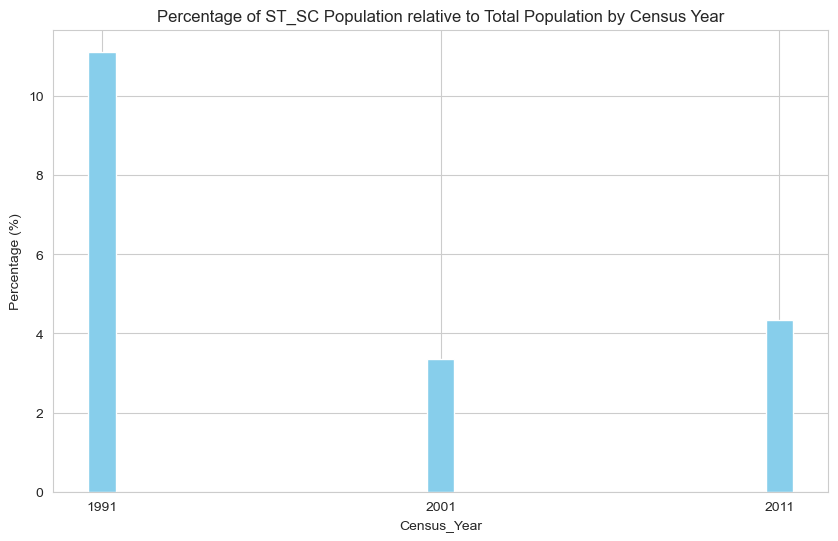

In [250]:
plt.figure(figsize=(10,6))
plt.bar(ST_SC_in_totalpop_per_year['Census_Year'],ST_SC_in_totalpop_per_year['Perc_ST_SC'],color='skyblue')
plt.xlabel('Census_Year')
plt.ylabel('Percentage (%)')
plt.title('Percentage of ST_SC Population relative to Total Population by Census Year')
plt.xticks(ST_SC_in_totalpop_per_year['Census_Year'])
plt.tight_layout
plt.show()

# Creation of a new column: Percentage_ST_SC_in_TotalPop

In [256]:
mh["Percentage_ST_SC_in_TotalPop"]=(mh["Sum_ST_SC_Population"]/mh["Total_population"])*100
# Grouping by District and Population_Group
grouped_data3=mh.groupby(["District","population_group"])["Percentage_ST_SC_in_TotalPop"].mean().reset_index()
#
top_10_districts=grouped_data3.nlargest(10,"Percentage_ST_SC_in_TotalPop")
# We want to see the top 10 villages with the highest percentage ratio of ST and SC combined in Total Population
top_10_districts

,District,population_group,Percentage_ST_SC_in_TotalPop
66,NANDURBAR,Village,86.505187
30,GADCHIROLI,Village,71.965599
27,DHULE,Village,59.868182
69,NASHIK,Village,55.592600
99,THANE,Village,52.918762
6,AMRAVATI,Village,48.179034
24,CHANDRAPUR,Village,44.407602
60,NAGPUR,Village,39.981170
108,YAVATMAL,Village,39.786267
33,GONDIYA,Village,37.021420
